# Ridge and Lasso Regression

In [2]:
#used to address the problem of multi-collinearity among variables that occurs while using linear regeression
#ridge regression= regularization term+OLS
#also known as L2 Regularization where L2-penality
#ridge -mean square error 
#lasso - mean absolute error
#lasso- is a type of linear regression that performs both variable selection and regularization to enhance prediction accuracy and interpretability

In [3]:
#ridge -->shrinks values closer to 0 but lasso---->shrinks values to 0
#lasso-->used when doing fewer predictions

1. Ridge regression is also known as L2 Regularization, is a technique used in linear regression to address the problem of multicollinearity among predictor variables
2. Multicollinearity coccurs when indepensent variables in a regression model are highly correlated, which can lead to unreliable & unstable estimates of regression coefficients
3. Ridge regression mitigates this issue by adding a regularization term to the ordinary least squares(OLS) objective function, which penalizes large coefficients and thus reduces their variance

### How Ridge Regression Addresses Overfitting and Multicollinearity?

1. Overfitting occurs when a model becomes too complex and fits noise in the training data, leading to poor generalization on new data.
2. Ridge regression combats overfitting by adding a penality term(L2) to the ordinary least squares(OLS) objective function
3. This penality discourages the modek from using large values for the coeffcients(the numbers multiplying the features)
4. It forces the model to keep these coefficients small
5. By making the coefficients smaller and closer to zero, ridge regression simplifies the model and reduces its sensitivity to random fluctuations or noise in the data.
6.  This makes the model less likely to overfit and helps it perform better on new, unseen data, improving its overall accuracy and reliability.

## Ridge Regression

In [7]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
# Simulating a dataset
np.random.seed(42)

In [9]:
# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})


In [10]:
# Simulating the target variable (house prices)
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit Ridge regression model
ridge = Ridge(alpha=100)  # alpha is the regularization parameter (lambda)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [13]:
# Predicting on test set
y_pred = ridge.predict(X_test)

In [14]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 91293939.24


In [15]:
# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
print(coefficients)

Coefficients:
         Feature  Coefficient
0  SquareFootage   302.291409
1       Bedrooms   309.860180
2      Bathrooms   111.570781
3       Location  8644.660183
4      YearBuilt  4920.791177


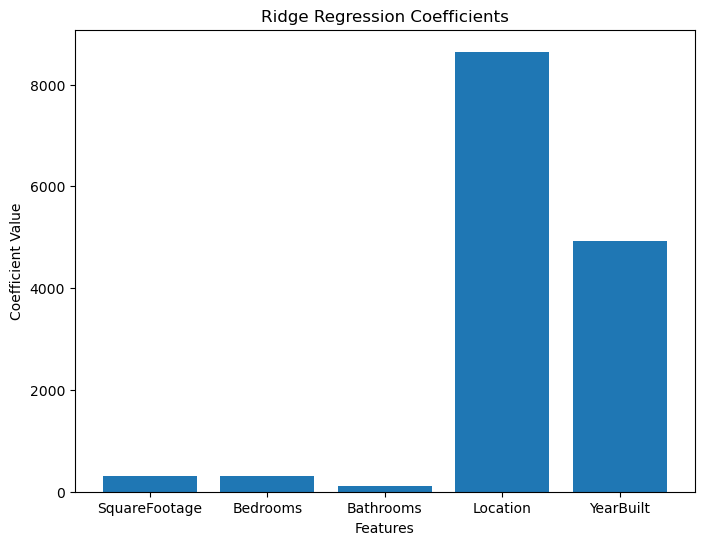

In [16]:
# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, ridge.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()

## Lasso Regression

#### What is lassso regression?
1. Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that performs both variable selection and regularization to enhance prediction accuracy and interpretability
2. It achieves this by applying a penalty (regularization) to the size of the regression coefficients, effectively shrinking some of them to zero.
3. This allows lasso to be useful in scenarios where we want a model that uses fewer predictors.



#### How it Works?
1. In a regular linear regression, we minimize the sum of squared errors between predicted and actual values
2. However, in lasso regression, we modify this by adding a penalty term, which is the sum of the absolute values of the coefficients.
3. This penalty is controlled by a hyperparameter, usually denoted as λ. As λ increases, more coefficients are shrunk toward zero, leading to simpler models.
4.  If λ is large enough, some coefficients can become exactly zero, which means lasso can also perform feature selection by effectively removing some features.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [21]:

# Simulating a dataset
np.random.seed(42)

In [22]:
# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})


In [23]:
# Simulating the target variable (house prices)
# Assuming only 'SquareFootage', 'Location', and 'YearBuilt' matter
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Fit Lasso regression model
lasso = Lasso(alpha=10000)  # alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=10000)

In [26]:
# Predicting on test set
y_pred = lasso.predict(X_test)

In [27]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 91360381.83


In [28]:
# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)


Coefficients:
         Feature  Coefficient
0  SquareFootage   302.242661
1       Bedrooms     0.000000
2      Bathrooms     0.000000
3       Location  8740.609068
4      YearBuilt  4905.145698


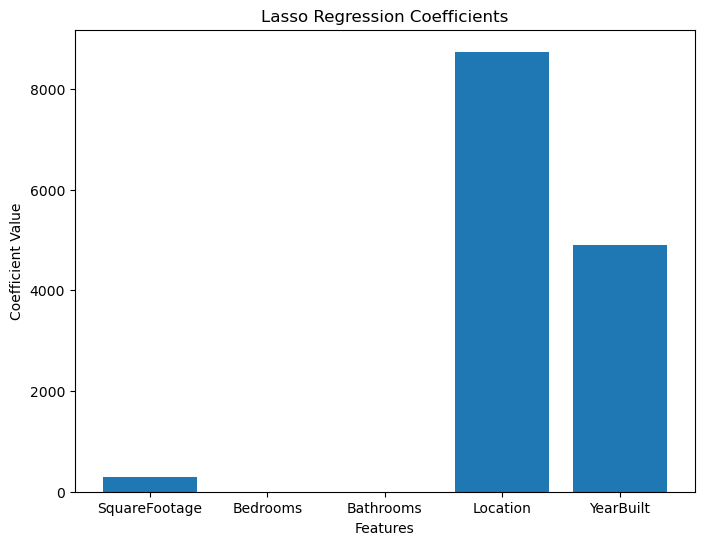

In [29]:

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
